In [1]:
import sys
import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'./')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=1,processes=False,memory_limit='20gb',threads_per_worker=14,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [3]:
from cov_3X2 import *
from lsst_utils import *

In [4]:
#only for python3
import importlib
reload=importlib.reload

In [5]:
zs=lsst_source_tomo_bins()

ns0:  27.0


# Power Spectrum covariance

In [6]:
#setup parameters
lmax_cl=5000
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False
Tri_cov=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

##  Test with 1 redshift bin

In [7]:
f_sky=0.35

In [8]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=True,unit_win=True,f_sky=f_sky)

{('galaxy', 'galaxy'): [(0, 0)]} {'shear': 0, 'galaxy': 1, 'kappa': 0}
Win gen: step size 768
Window done


./cov_utils.py:60: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
./angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
  self.cl_f=(l+0.5)**2/(l*(l+1.)) # cl correction from Kilbinger+ 2017


cl dict done


In [9]:
zs_bin1[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'AI', 'AI_z', 'mag_fact', 'lm', 'Gkernel', 'Gkernel_int', 'gkernel', 'gkernel_int', 'kernel_int', 'window', 'window_alm', 'window_alm_noise'])

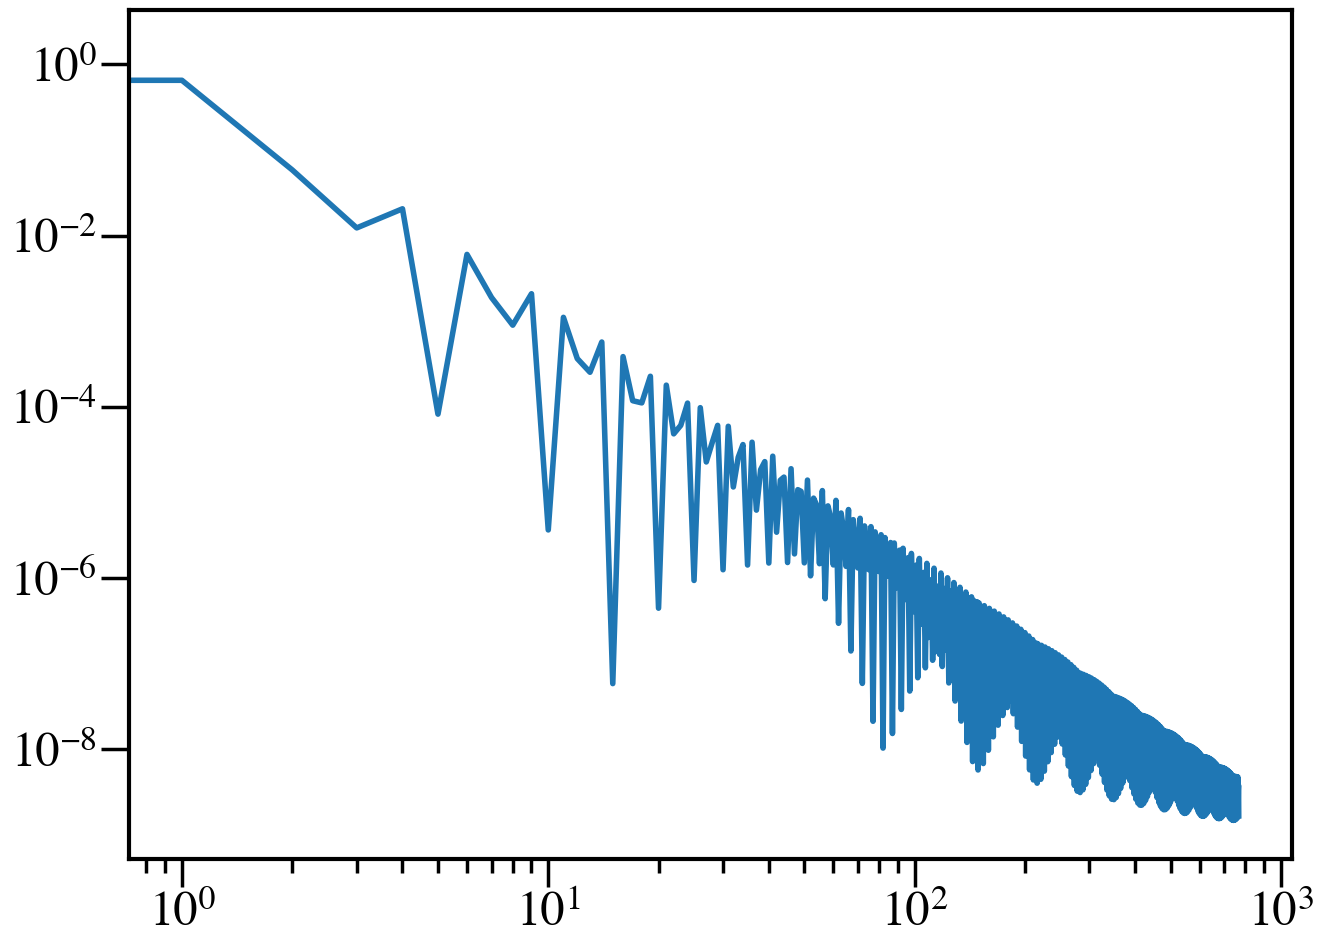

In [10]:
# loglog(zs_bin1[0]['window_cl'])
loglog(hp.alm2cl(zs_bin1[0]['window_alm']))

/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


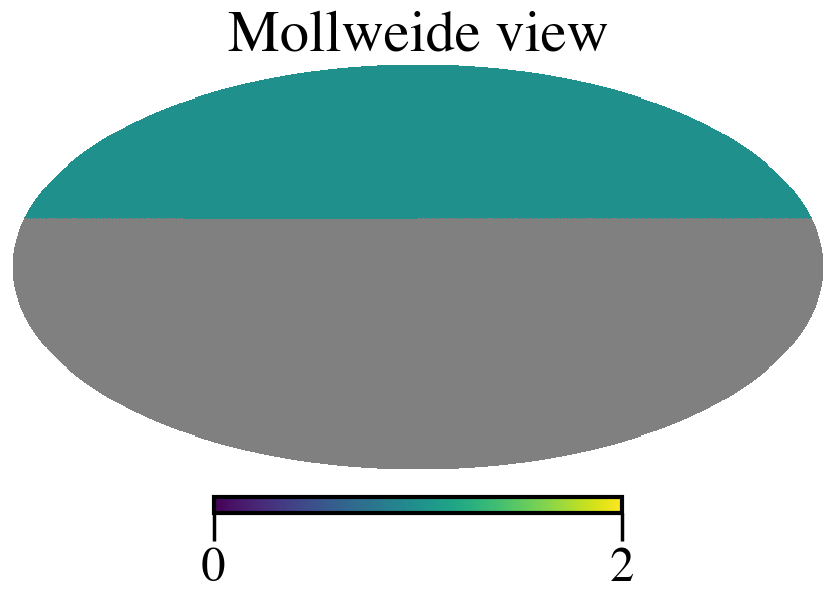

In [11]:
hp.mollview(zs_bin1[0]['window'])

In [12]:
import cov_3X2
reload(cov_3X2)
from cov_3X2 import *

In [13]:
# bin_cl=False
if not bin_cl:
    lb=l0
    l=l0

In [14]:
from astropy.cosmology import Planck15 as cosmo


In [15]:
import pyccl as ccl
cosmo_params={'h': 0.6774,
 'Omb': 0.0486,
 'Omd': 0.2589,
 's8': 0.817,
 'Om': 0.3075,
 'As': 2.12e-09,
 'mnu': 0.06,
 'Omk': 0.0,
 'tau': 0.06,
 'ns': 0.965,
 'w': -1,
 'wa': 0,
 'Oml': 0.6925}

In [16]:
use_window=False

In [17]:
power_spectra_kwargs={'pk_func':'baryon_pk'}

In [18]:
#on nersc try /global/cscratch1/sd/sukhdeep/temp/
# only needed if you are playing with window calculations, kappa_win below
wigner_files={}
wigner_files[0]= 'temp/dask_wig3j_l6500_w2100_0_reorder.zarr'
wigner_files[2]= 'temp/dask_wig3j_l6500_w1100_2_reorder.zarr'

In [19]:
#use all ell
kappa0=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       )

#to test calculation using proper windows, in SSC.
# kappa_win=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
#                                        use_window=True,Tri_cov=Tri_cov,store_win=True,
#                                        SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
#                                        wigner_files=wigner_files)

./cov_utils.py:60: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th


{('shear', 'shear'): [(0, 0)]} {'shear': 1, 'galaxy': 0, 'kappa': 0}
Win gen: step size 807
Window done


In [20]:
bi=(0,0)

In [21]:
#get compute graphs
%time cl0G=kappa0.cl_tomo() 
# %time cl0G_win=kappa_win.cl_tomo() 

cl dict done
CPU times: user 22.6 s, sys: 658 ms, total: 23.3 s
Wall time: 16.5 s


In [22]:
%time cl0=cl0G['stack'].compute()
# %time cl0_win=cl0G_win['stack'].compute()
# %time clB=clBG['stack'].compute()

CPU times: user 22.2 s, sys: 5.29 s, total: 27.5 s
Wall time: 3.3 s


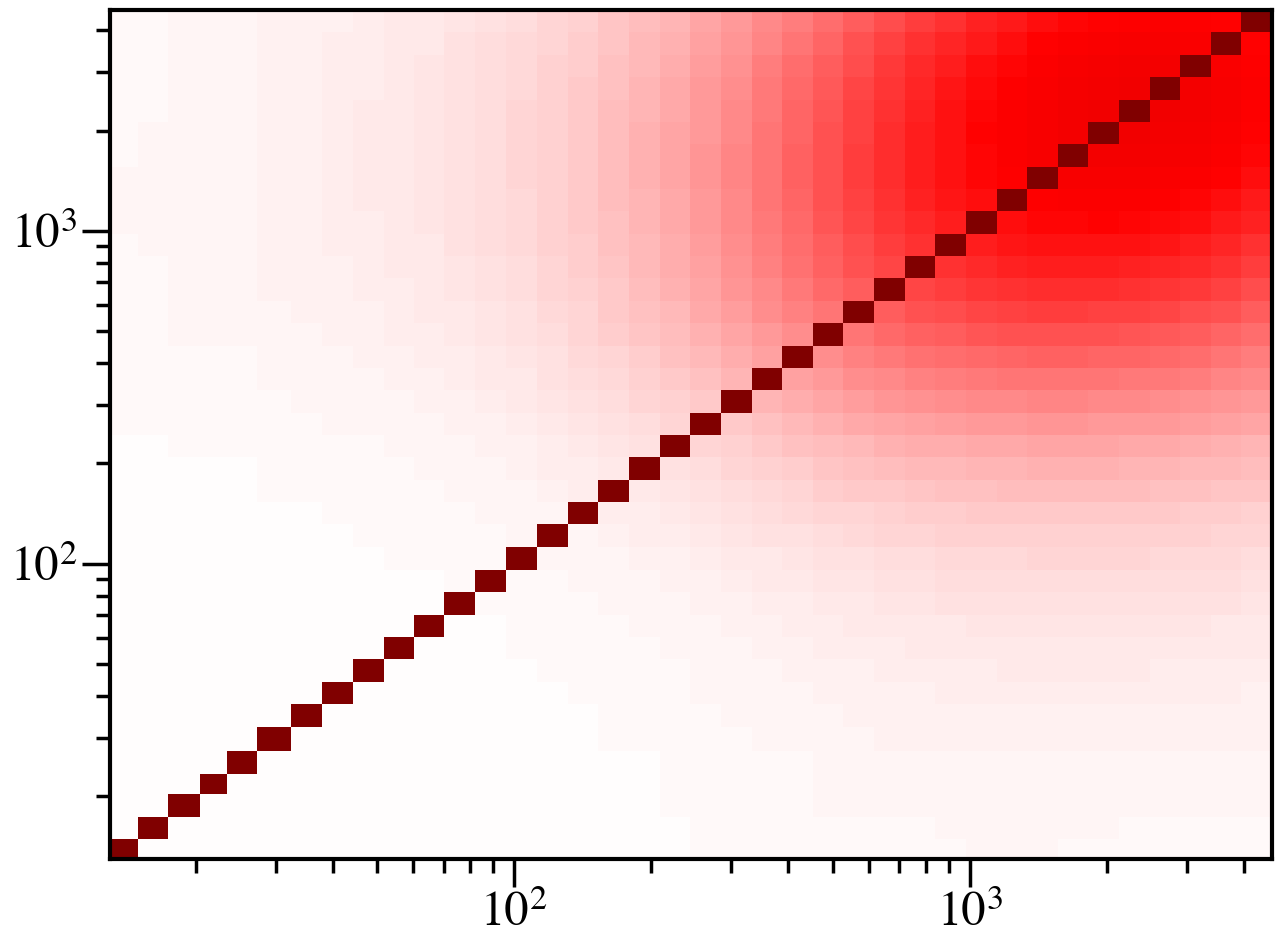

In [23]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [24]:
# compute signal/noise
cov_inv=np.linalg.inv(cl0['cov'])
SN2=(np.dot(cl0['cl_b'],np.dot(cov_inv,cl0['cl_b'])))
np.sqrt(SN2)

213.21912105986894

In [25]:
#again get Cl and cov, this time by referencing the particular bin
cl0={}
corr=('shear','shear')
%time cl0['cl0']=cl0G['cl'][corr][(0,0)].compute()
%time cl0['cl']=cl0G['cl_b'][corr].compute()
%time cl0['cov']=cl0G['cov'][corr+corr][(0,0,0,0)].compute()#kappa0.compute_cov_tomo(cl0G['cov'])

CPU times: user 93.3 ms, sys: 56.9 ms, total: 150 ms
Wall time: 14.1 ms
CPU times: user 109 ms, sys: 215 ms, total: 324 ms
Wall time: 23.9 ms
CPU times: user 26.6 s, sys: 5.67 s, total: 32.3 s
Wall time: 3.9 s


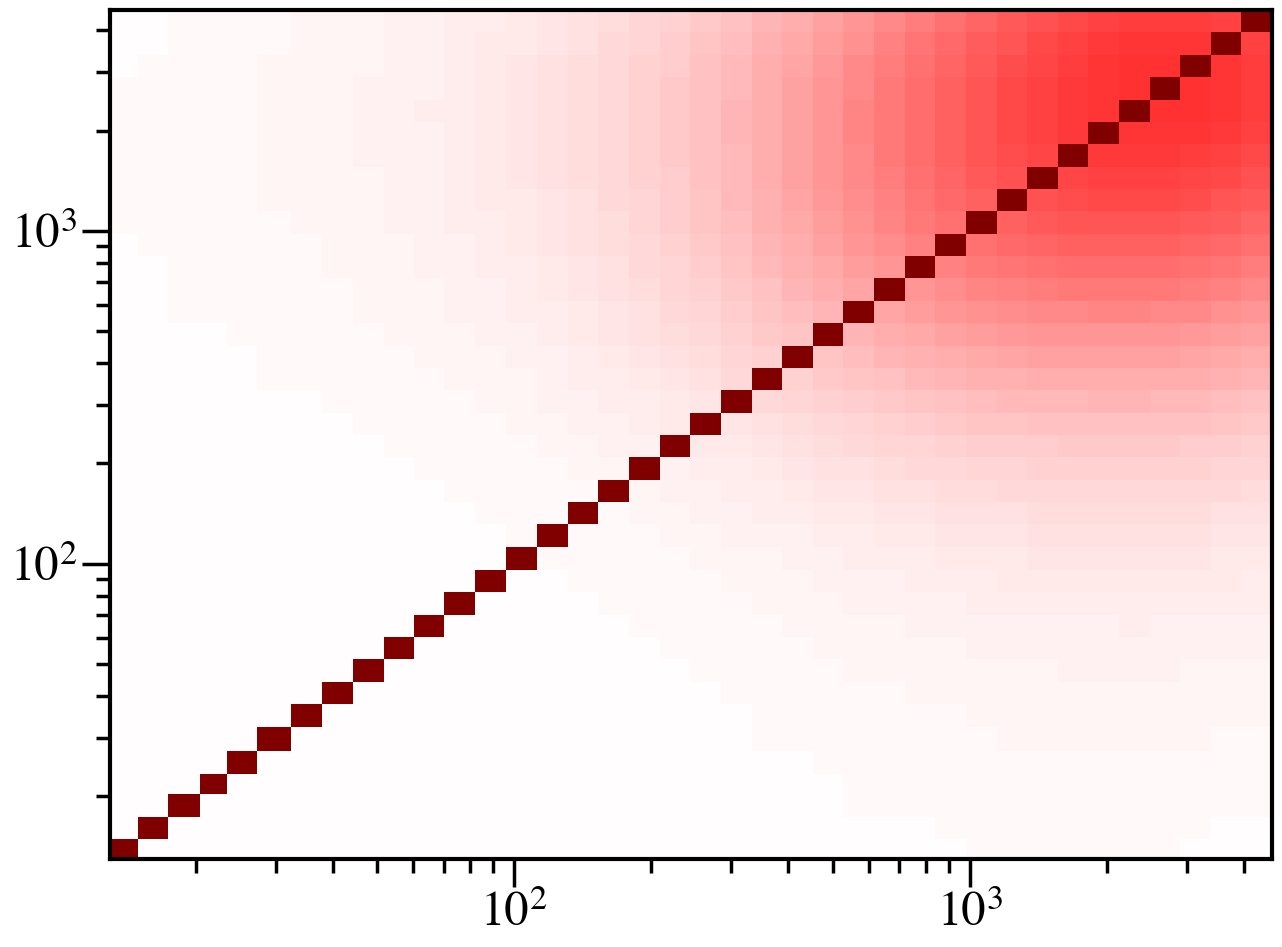

In [26]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['final_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

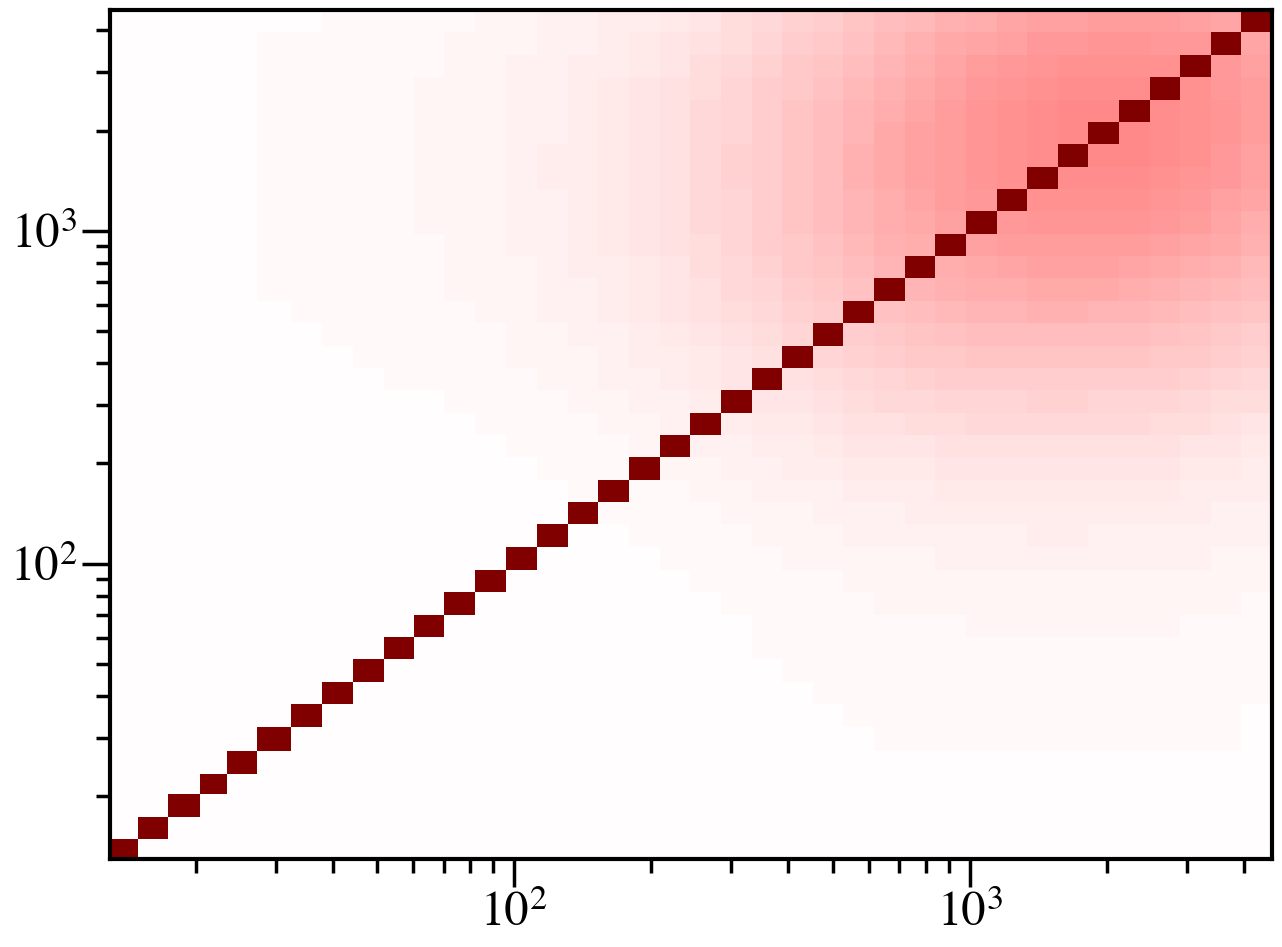

In [27]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['G_b']+cl0['cov']['SSC_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

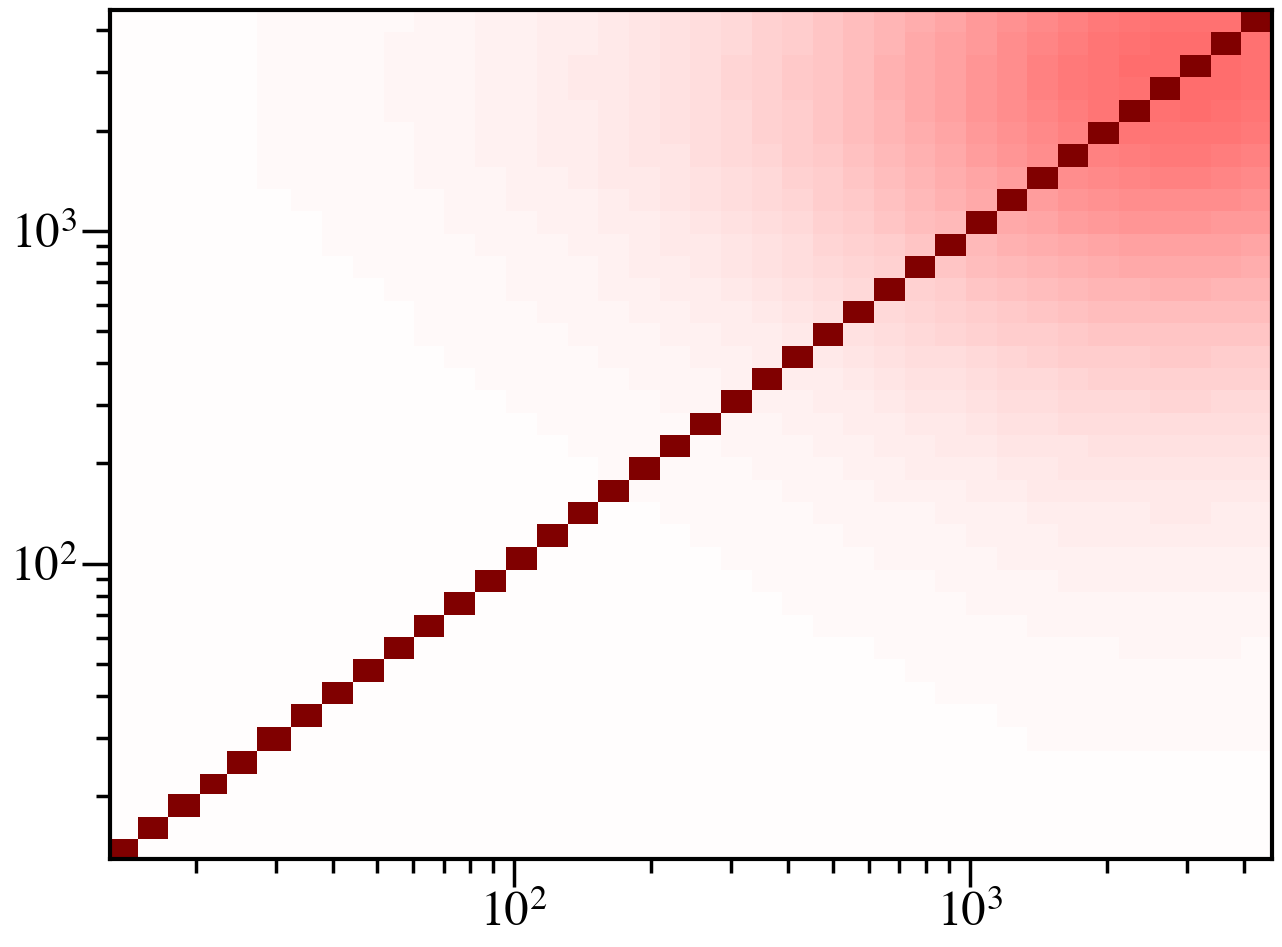

In [28]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['G_b']+cl0['cov']['Tri_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

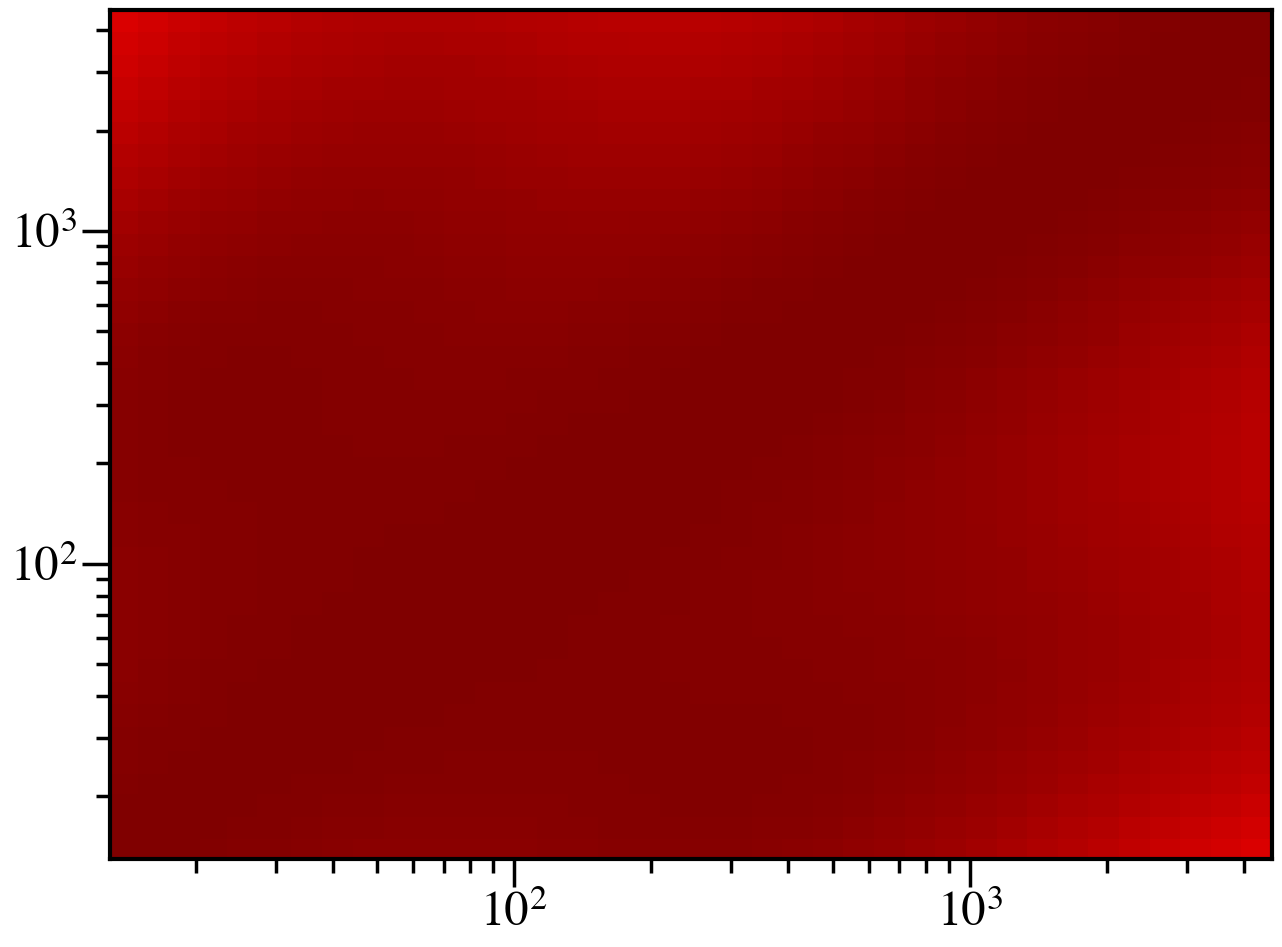

In [29]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['SSC_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

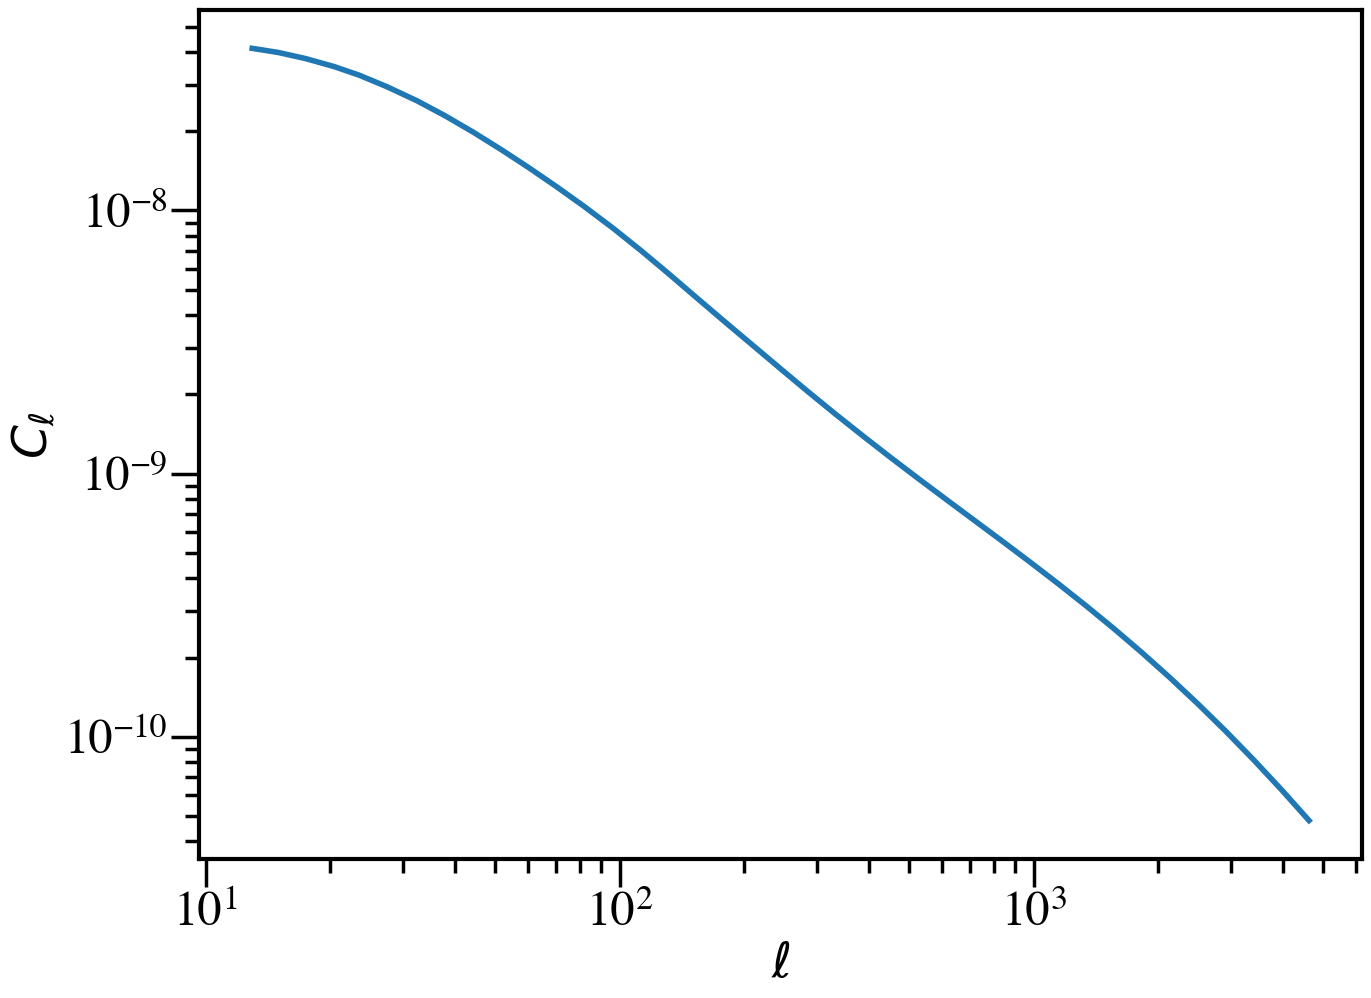

In [30]:
cl_t=cl0['cl'][(0,0)]
plot(lb,cl_t)
# hlines(1,1,2000)
xscale('log')
yscale('log')
xlabel('$\ell$')
ylabel('$C_\ell$')
show()

In [31]:
kappa0.cov_utils.Om_W

4.39822971502571

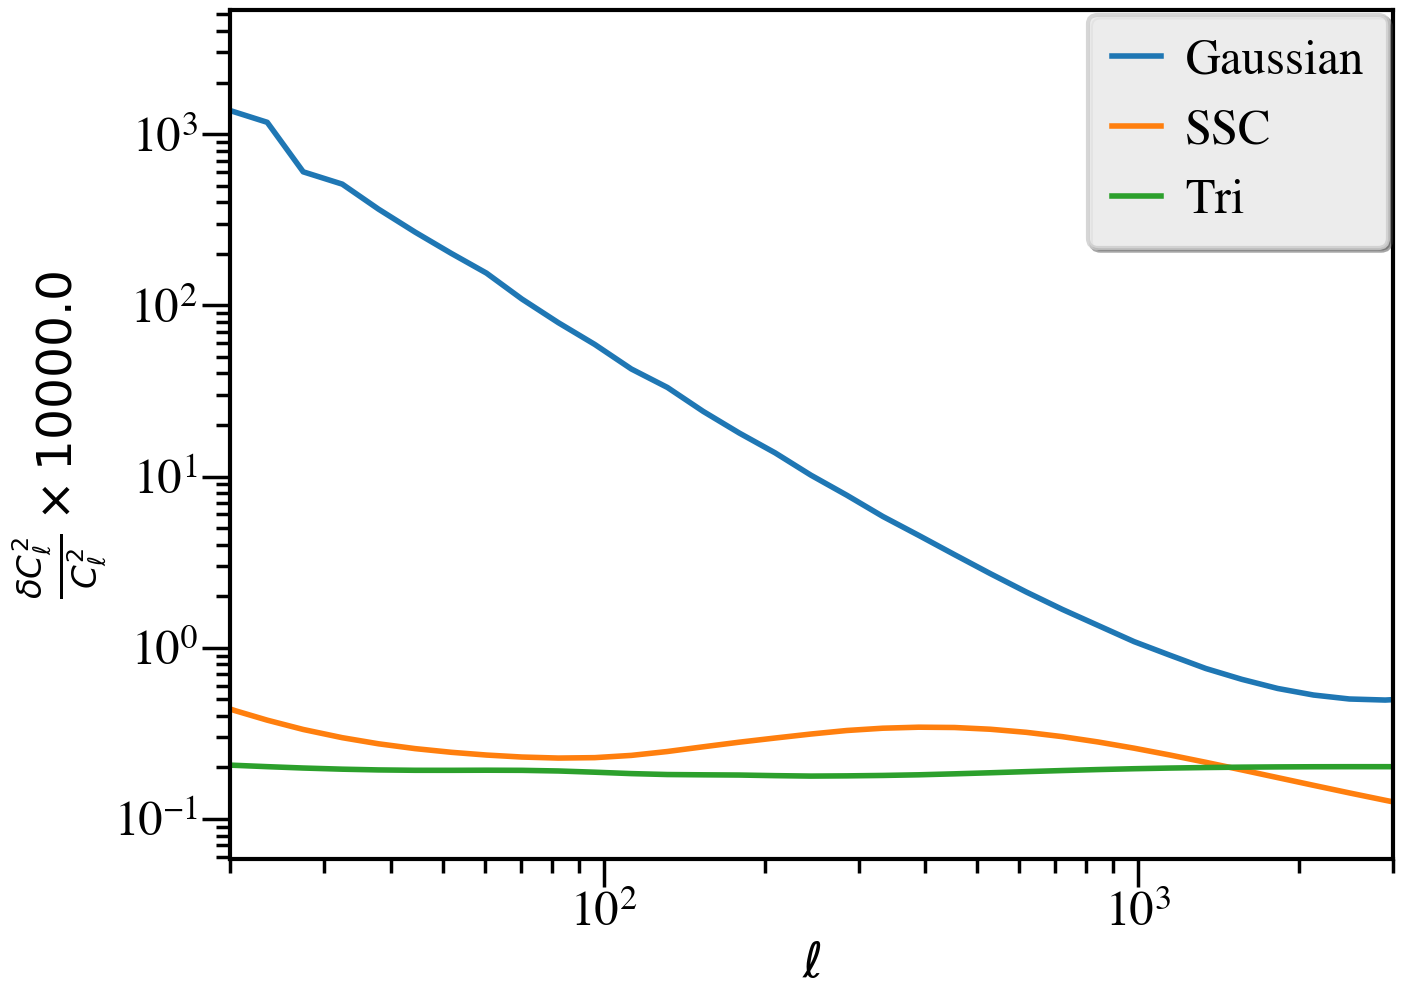

In [32]:
cov0=cl0['cov']#[(0,0,0,0)]
# cov0_win=cl0_win['cov']#[(0,0,0,0)]

f=1e4
plot(lb,np.diag(cov0['G_b'])/cl_t**2*f,label='Gaussian')
plot(lb,np.diag(cov0['SSC_b'])/cl_t**2*f,label='SSC')
plot(lb,np.diag(cov0['Tri_b'])/cl_t**2*f,label='Tri')
# plot(lb,np.diag(cov0_win['SSC_b'])/cl_t**2*f,label='SSC_win')
# plot(lb,np.diag(cov0['SSC_dk'])/cl_t**2*f)
xscale('log')
yscale('log')
xlim(20,3000)
xlabel(r'$\ell$')
ylabel(r'$\frac{\delta C_\ell^2}{C_\ell^2}\times'+str(f)+'$')
legend()

In [33]:
kappa0.CTR.N

array([5.09306290e+04, 1.14592606e+05, 2.03719374e+05, ...,
       3.17928029e+11, 3.18055289e+11, 3.18182575e+11])

In [34]:
kappa0.CTR.k

array([   2,    3,    4, ..., 4997, 4998, 4999])

(0.0001, 10)

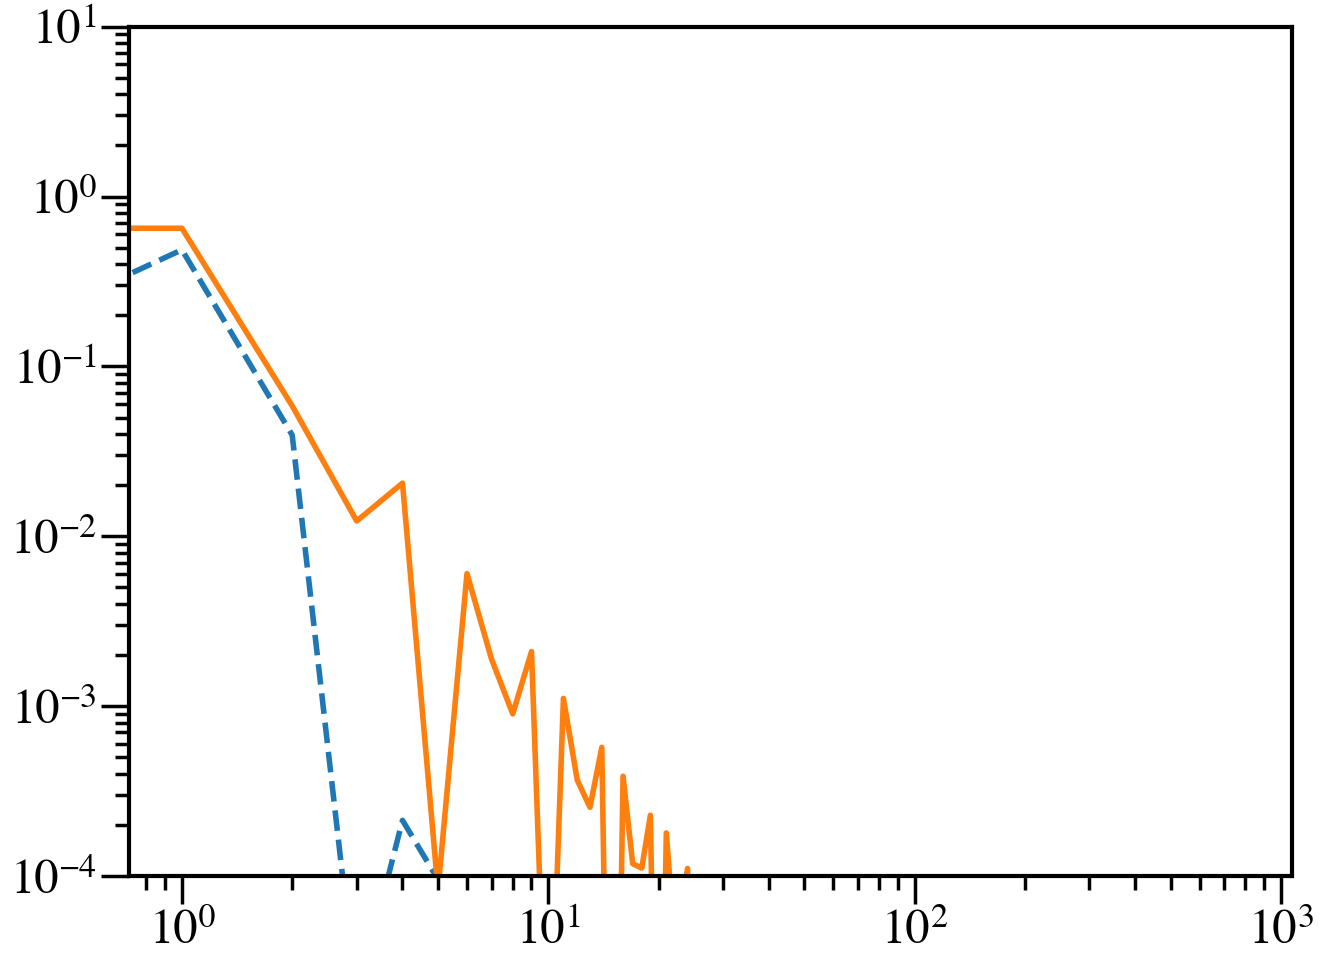

In [35]:
plot(kappa0.cov_utils.window_l,kappa0.cov_utils.Win**2,'--')
plot(hp.alm2cl(zs_bin1[0]['window_alm']))
loglog()
ylim(.0001,10)

In [36]:
def matrix_cut(mat=[],x=[]):
    m=mat[x]
    N=sum(x)
    m2=np.zeros((N,N))
    j=0
    for i in m:
        m2[j]=i[x]
        j=j+1
    return m2

def SN_cum(cov=[],lb=[],cl=[],diag=False,lmin=2,use_hartlap=False,nsim=1000):
    sni=np.zeros_like(lb)
    for i in np.arange(len(lb)):
        if lb[i]<lmin:
            continue
        x=lb<=lb[i]
        x*=lb>lmin
        cov2_cut=matrix_cut(mat=cov,x=x)
        if diag:
            cov2_cut=np.diag(np.diag(cov2_cut))
        cov2_cut_inv=np.linalg.inv(cov2_cut)
        
        cl_i=cl[x]
        SN2=cl_i@cov2_cut_inv@cl_i
        if use_hartlap:
            SN2*=(nsim-2-x.sum())/(nsim-1)
        sni[i]=SN2
    return sni

In [37]:
sn2={}
sn2['all']=SN_cum(cov=cl0['cov']['final_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G']=SN_cum(cov=cl0['cov']['G_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G_SSC']=SN_cum(cov=cl0['cov']['G_b']+cl0['cov']['SSC_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G_Tri']=SN_cum(cov=cl0['cov']['G_b']+cl0['cov']['Tri_b'],cl=cl0['cl'][bi],lb=lb)

(10, 5000)

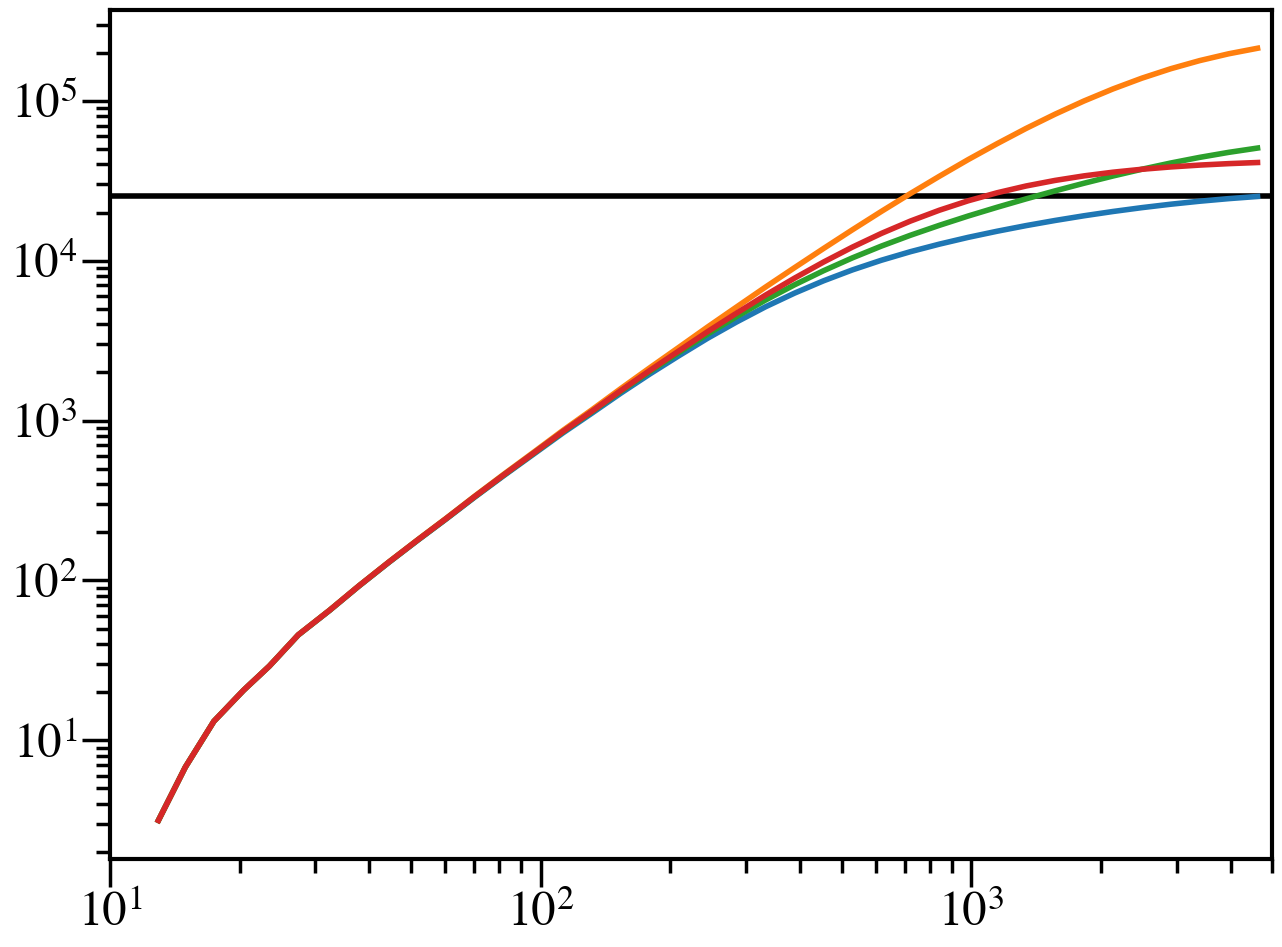

In [38]:
plot(lb,sn2['all'])
plot(lb,sn2['G'])
plot(lb,sn2['G_SSC'])
plot(lb,sn2['G_Tri'])

loglog()
hlines(sn2['all'][-1],10,5000)
xlim(10,5000)

In [39]:
nside=4096
wl=hp.pixwin(nside)
l=np.arange(len(wl))

In [40]:
from scipy.interpolate import interp1d

In [41]:
ww=interp1d(l,wl,bounds_error=False,fill_value=0)
l2=np.arange(nside*10)
wl2=ww(l2)

In [42]:
x=l2>l.max()
print(wl2[x],wl[-1])
lm=l2[x][0]/(1+np.sqrt(-1*np.log(wl[-1])))
# lm=l2[x][0]/(1+(-1*np.log(wl[-1])))
wl2[x]+=np.exp(-((l2[x]-lm)/lm)**2)

[0. 0. 0. ... 0. 0. 0.] 0.4468198129346118


In [43]:
wl.max(),wl2.max()

(1.0000000000000016, 1.0000000000000016)

(1, 30000.0)

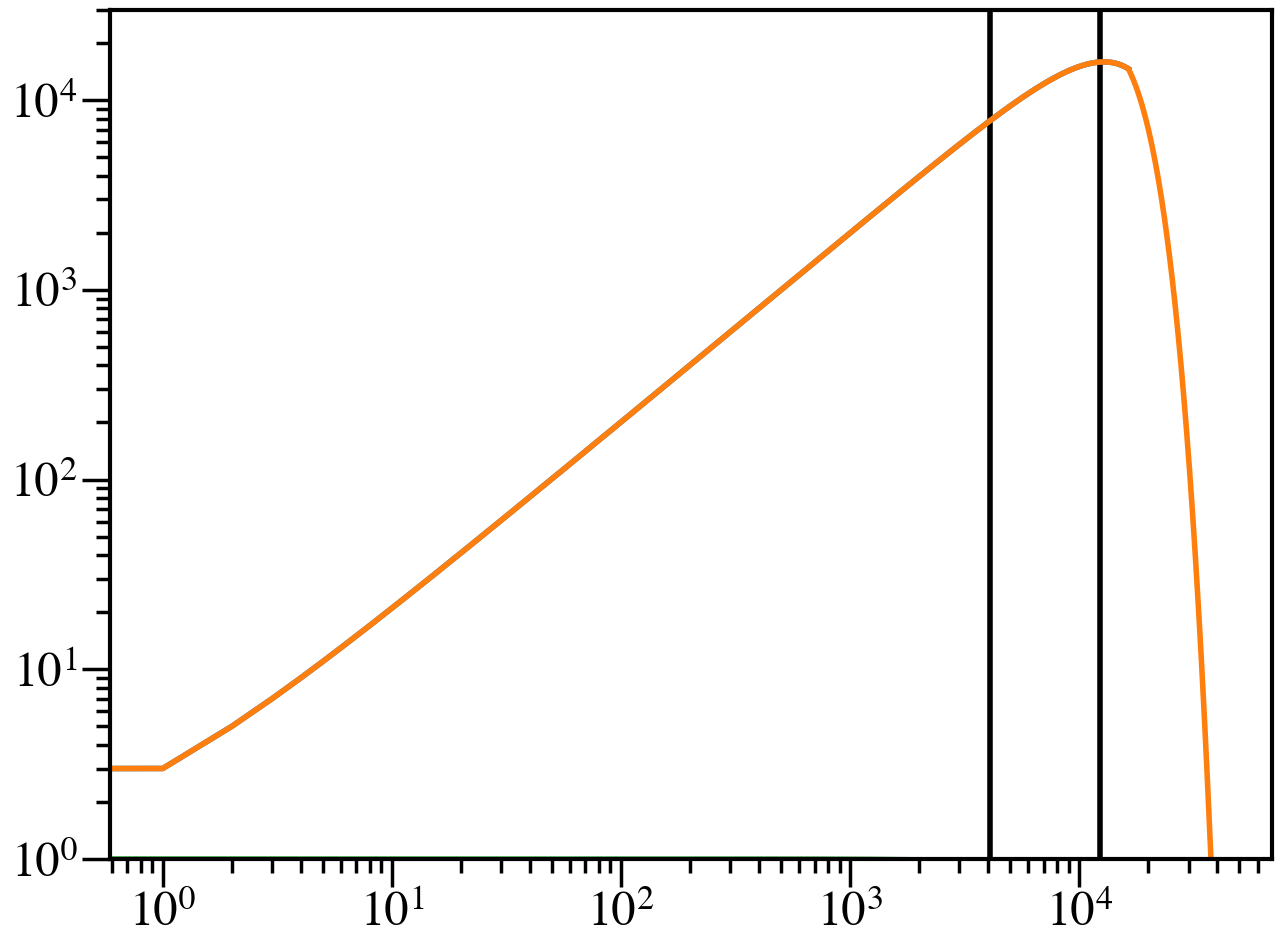

In [44]:
f=(2*l+1)
plot(wl*f)
f2=(2*l2+1)
plot(wl2*f2)
plot(wl)
xscale('log')
yscale('log')
# ylim(1.e-3,1.1)
vlines(nside,1,1.e5)
vlines(nside*3,1,1.e5)
ylim(1,3.e4)

In [45]:
kappa0.Ang_PS.clz

{'cls': array([[1.6026611e+02, 7.8742966e+01, 4.5783287e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.6128357e+02, 7.9727074e+01, 4.6502014e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.6195631e+02, 8.0607056e+01, 4.7182457e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [5.4575875e-04, 7.3975889e-04, 9.2132087e-04, ..., 9.0034509e-06,
         9.0009444e-06, 8.9984378e-06],
        [4.1192627e-04, 5.5948849e-04, 6.9830136e-04, ..., 7.6515907e-06,
         7.6495344e-06, 7.6474807e-06],
        [3.1099134e-04, 4.2316291e-04, 5.2916905e-04, ..., 6.4265269e-06,
         6.4248529e-06, 6.4231790e-06]], dtype=float32),
 'l': array([   2,    3,    4, ..., 4997, 4998, 4999]),
 'cH': array([2997.78598356, 2997.77246997, 2997.75763872, 2997.7413613 ,
        2997.72349671, 2997.70389016, 2997.68237177, 2997.65875511,
        2997.63283555, 2997.60438849, 2997.57316743, 2997.53890183,
        2997.